In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
from models import ModelManager, ModelType
from utils import MnistData

In [ ]:
data = MnistData()

## Training

In [197]:
generator = ModelManager.get_untrained(ModelType.Generator)
discriminator = ModelManager.get_untrained(ModelType.Discriminator)

In [200]:

generator_optimizer = optim.SGD(generator.parameters(), lr=1e-4, momentum=True)
discriminator_optimizer = optim.SGD(discriminator.parameters(), lr=1e-5, momentum=True)

batch = 10

# pre-train the discriminator
for epoch in range(150):
    # sampling
    batch_of_real_data, _ = data.get_training_batch(batch)
    batch_of_noise = torch.rand(batch, 100)
    
    # zero grad
    generator_optimizer.zero_grad()
    discriminator_optimizer.zero_grad()

    # predictions
    batch_of_generated = generator(batch_of_noise)
    batch_of_generated_discrimination = discriminator(batch_of_generated)
    batch_of_real_discrimination = discriminator(batch_of_real_data)

    # computing loss
    discriminator_loss = - ((1 - batch_of_generated_discrimination).log().sum() / batch) - (batch_of_real_discrimination.log().sum() / batch)
    discriminator_loss.backward()
    discriminator_optimizer.step()
    if epoch % 10 == 0:
        print(f'D--{epoch}:{discriminator_loss.item()}--D')

discriminator_optimizer = optim.SGD(discriminator.parameters(), lr=1e-6)

for epoch in range(350):
    # sampling
    batch_of_real_data, _ = data.get_training_batch(batch)
    batch_of_noise = torch.rand(batch, 100)
    
    # zero grad
    generator_optimizer.zero_grad()
    discriminator_optimizer.zero_grad()

    # predictions
    batch_of_generated = generator(batch_of_noise)
    batch_of_generated_discrimination = discriminator(batch_of_generated)
    batch_of_real_discrimination = discriminator(batch_of_real_data)

    # computing loss
    discriminator_loss = - ((1 - batch_of_generated_discrimination).log().sum() / batch) - (batch_of_real_discrimination.log().sum() / batch)
    discriminator_loss.backward()
    discriminator_optimizer.step()

    batch_of_generated = generator(batch_of_noise)
    batch_of_generated_discrimination = discriminator(batch_of_generated)

    generator_loss = (1 - batch_of_generated_discrimination).log().sum() / batch
    discriminator_optimizer.zero_grad()
    generator_optimizer.zero_grad()
    generator_loss.backward()
    generator_optimizer.step()

    # log
    if epoch % 10 == 0:
        print(f'---{epoch}:D:{discriminator_loss.item()}:G:{generator_loss.item()}---')
        # MnistData.display(batch_of_generated[0], scale=True)

D--0:4.47751522064209--D
D--10:2.894102096557617--D
D--20:1.0250822305679321--D
D--30:2.863093137741089--D
D--40:3.895238161087036--D
D--50:2.4973530769348145--D
D--60:1.063683032989502--D
D--70:1.0444930791854858--D
D--80:1.1651852130889893--D
D--90:1.150124430656433--D
D--100:1.175758957862854--D
D--110:1.140583872795105--D
D--120:1.1136375665664673--D
D--130:1.0858478546142578--D
D--140:1.0331603288650513--D
---0:D:0.9749301671981812:G:-0.7803661227226257---
---10:D:0.998538076877594:G:-0.7808337211608887---
---20:D:1.008284330368042:G:-0.7822197675704956---
---30:D:0.9820681214332581:G:-0.7843984961509705---
---40:D:1.0122990608215332:G:-0.7874528169631958---
---50:D:1.0176138877868652:G:-0.7916037440299988---
---60:D:1.0090388059616089:G:-0.7968555688858032---
---70:D:0.9813884496688843:G:-0.8031379580497742---
---80:D:1.04685378074646:G:-0.8108793497085571---
---90:D:1.0307257175445557:G:-0.8197866678237915---
---100:D:1.025138020515442:G:-0.8302340507507324---
---110:D:1.0911655

## Check

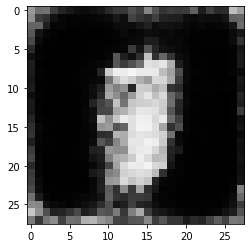

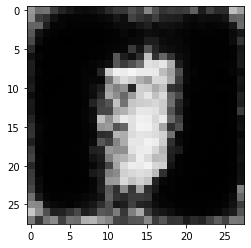

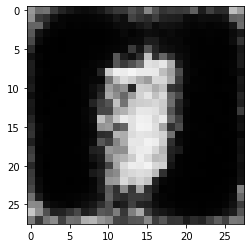

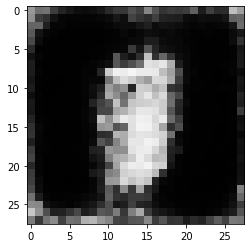

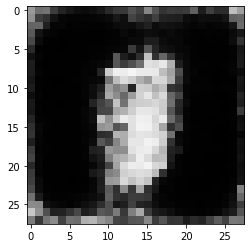

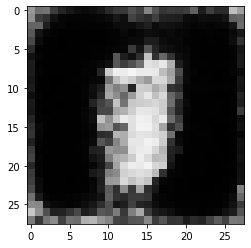

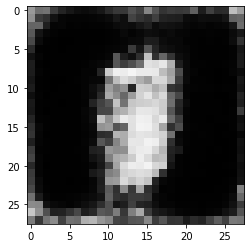

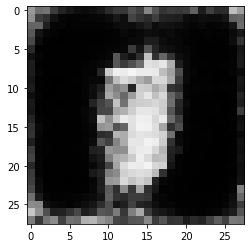

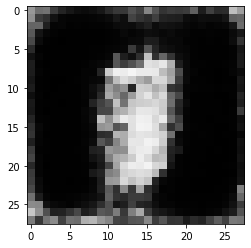

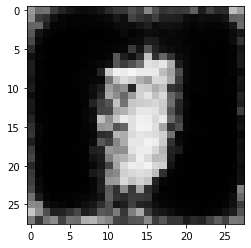

In [201]:
examples = generator(torch.rand(10, 100))

for i in range(10):
    MnistData.display(examples[i], scale=True)